### **Project :- Mobile Price classification**

**Objective**

The aim of this project is to analyze various mobile phone features and determine their impact on price classification. By leveraging machine learning techniques, we aim to classify mobile phones into different price ranges based on key attributes like RAM, battery power, screen resolution, camera quality, and connectivity features. This will help in understanding which factors contribute the most to pricing and assist manufacturers in strategic pricing decisions.


In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#!pip install xgboost
import xgboost as xgb

#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Kaggle projects/Mobile price prediction')

### **Data Loading**

In [ ]:
mob_data=pd.read_csv("mobileprice.csv")
mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **Data Exploration**

In [ ]:
mob_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
print(mob_data.shape)
mob_data.info()

(2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 1

In [ ]:
mob_data.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df_numerical=mob_data[['battery_power', 'clock_speed', 'int_memory', 'm_dep',	'mobile_wt', 'px_height',	'px_width',	'ram']]

# Detecting outliers based on Interquartile Range (IQR) Method
def detect_outliers_iqr(data, columns):
    outliers_iqr = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_iqr[col] = outliers[col]
    return outliers_iqr

# Detect outliers using IQR for each numerical feature
outliers_iqr = detect_outliers_iqr(mob_data, df_numerical)

# Display outliers for each column
for col, outliers in outliers_iqr.items():
    print(f'Outliers in {col}:\n{outliers}\n')

Outliers in battery_power:
Series([], Name: battery_power, dtype: int64)

Outliers in clock_speed:
Series([], Name: clock_speed, dtype: float64)

Outliers in int_memory:
Series([], Name: int_memory, dtype: int64)

Outliers in m_dep:
Series([], Name: m_dep, dtype: float64)

Outliers in mobile_wt:
Series([], Name: mobile_wt, dtype: int64)

Outliers in px_height:
988     1949
1771    1960
Name: px_height, dtype: int64

Outliers in px_width:
Series([], Name: px_width, dtype: int64)

Outliers in ram:
Series([], Name: ram, dtype: int64)



### **Exploratory Data Analysis**

**Univariant Analysis**

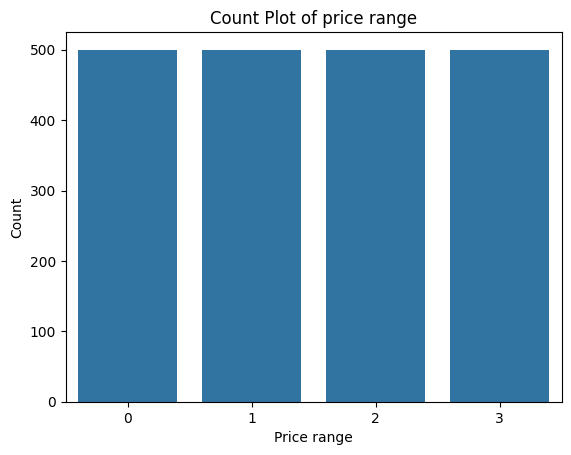

,count
price_range,
1,500
2,500
3,500
0,500


In [ ]:
#exploring target variable
sns.countplot(x='price_range', data=mob_data)
plt.xlabel('Price range')
plt.ylabel('Count')
plt.title('Count Plot of price range')
plt.show()
mob_data['price_range'].value_counts()

all mobile price ranges are equally distributed and the target variable is balanced.


In [ ]:
# filtering categorical data
df_categorical=mob_data[['blue', 'dual_sim', 'fc','four_g', 'n_cores', 'pc', 'sc_h',	'sc_w',	'talk_time', 'three_g', 'touch_screen',	'wifi']]
print(df_categorical.shape)
df_categorical.head()

(2000, 12)


,blue,dual_sim,fc,four_g,n_cores,pc,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,0,1,0,2,2,9,7,19,0,0,1
1,1,1,0,1,3,6,17,3,7,1,1,0
2,1,1,2,1,5,6,11,2,9,1,1,0
3,1,0,0,0,6,9,16,8,11,1,0,0
4,1,0,13,1,2,14,8,2,15,1,1,0


In [ ]:
df_count=mob_data[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen',	'wifi']]
value_counts = df_count.apply(pd.Series.value_counts)

   blue  dual_sim  four_g  three_g  touch_screen  wifi
0  1010       981     957      477           994   986
1   990      1019    1043     1523          1006  1014


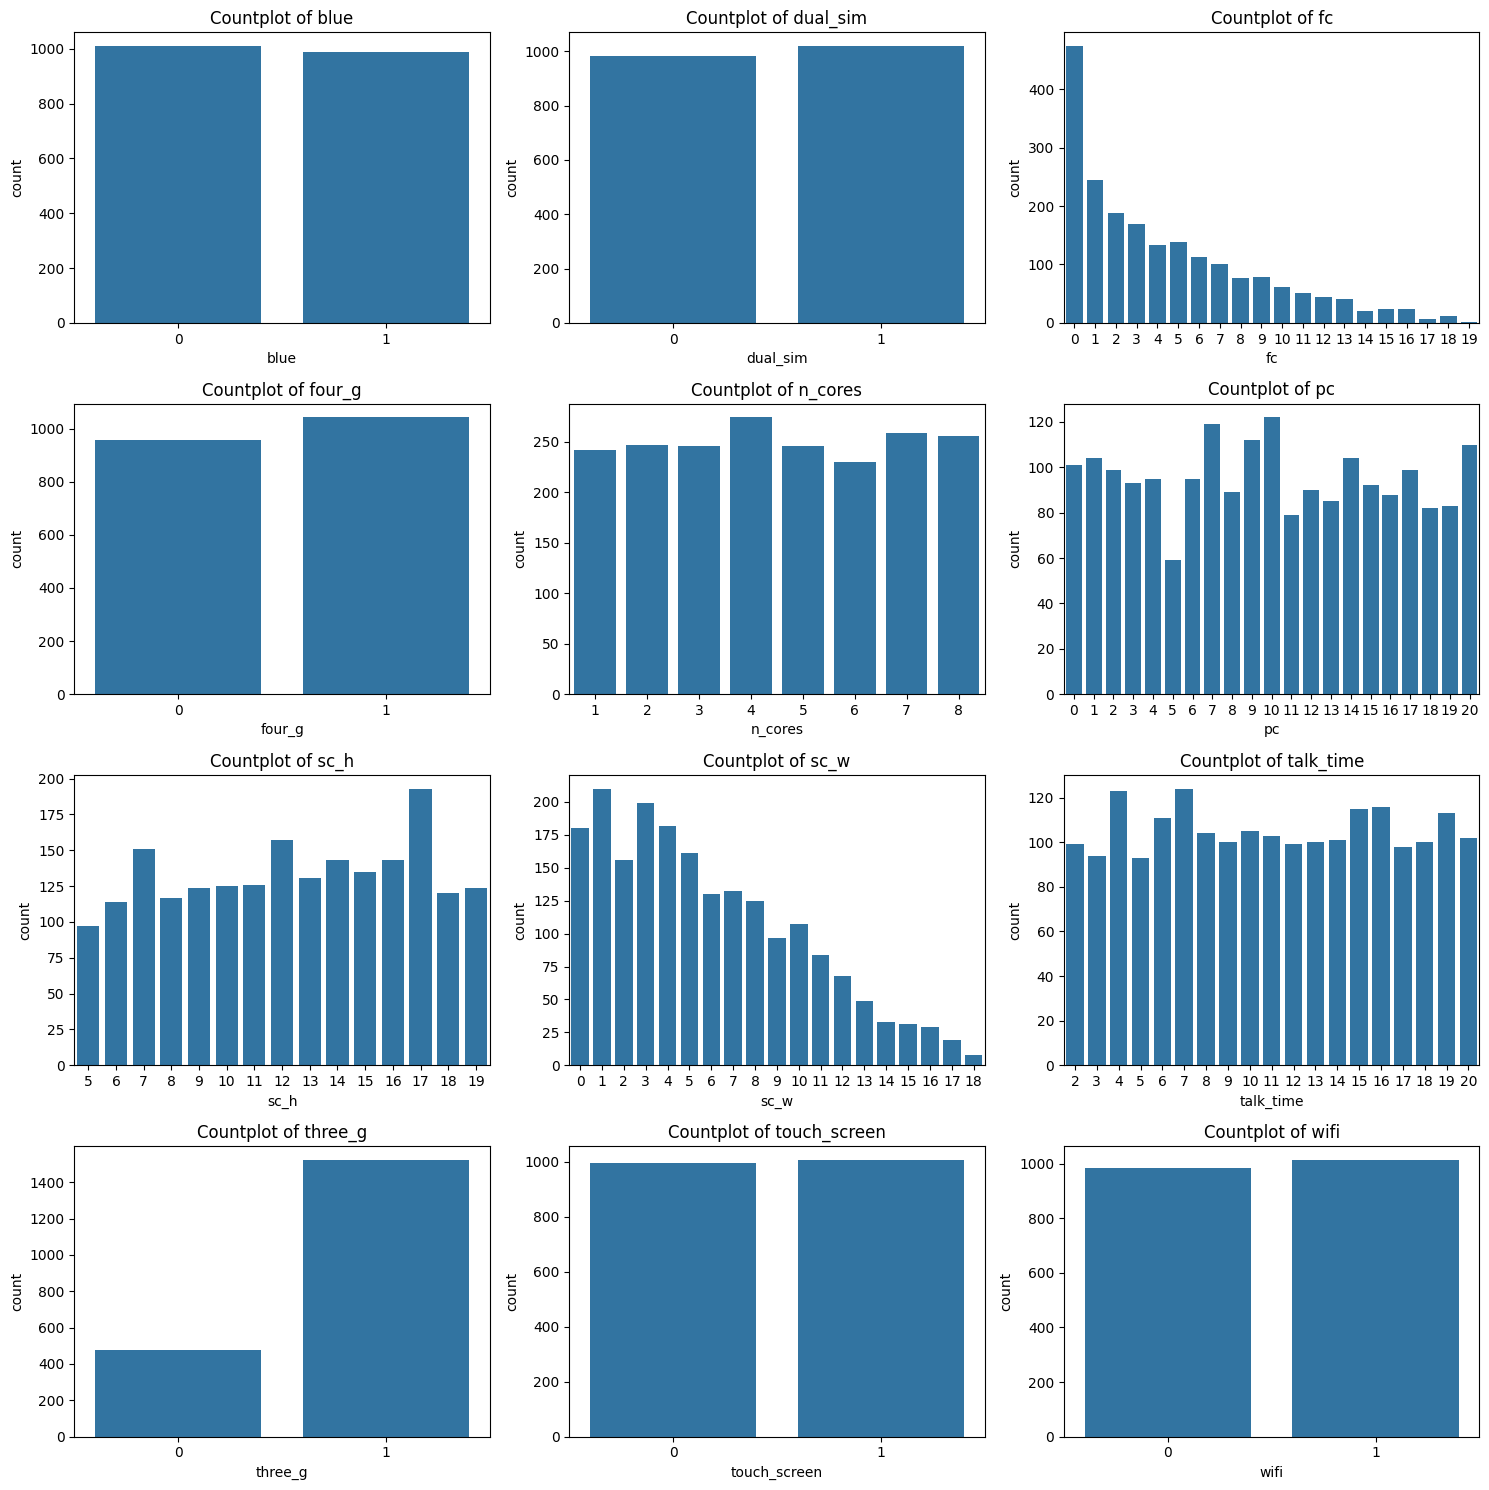

In [ ]:
# Distributions of categorical features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(df_categorical.columns):
    sns.countplot(x=col, data=df_categorical, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
print(value_counts)
plt.show()

**Observations:**
Most mobiles having dual sim, 4G, 3G, touch secreen, wifi and without bluetooth. But, comparing with 4G network 3G network devices are high.

In [ ]:
#Numerical data
print(df_numerical.shape)
df_numerical.head()

(2000, 8)


,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram
0,842,2.2,7,0.6,188,20,756,2549
1,1021,0.5,53,0.7,136,905,1988,2631
2,563,0.5,41,0.9,145,1263,1716,2603
3,615,2.5,10,0.8,131,1216,1786,2769
4,1821,1.2,44,0.6,141,1208,1212,1411


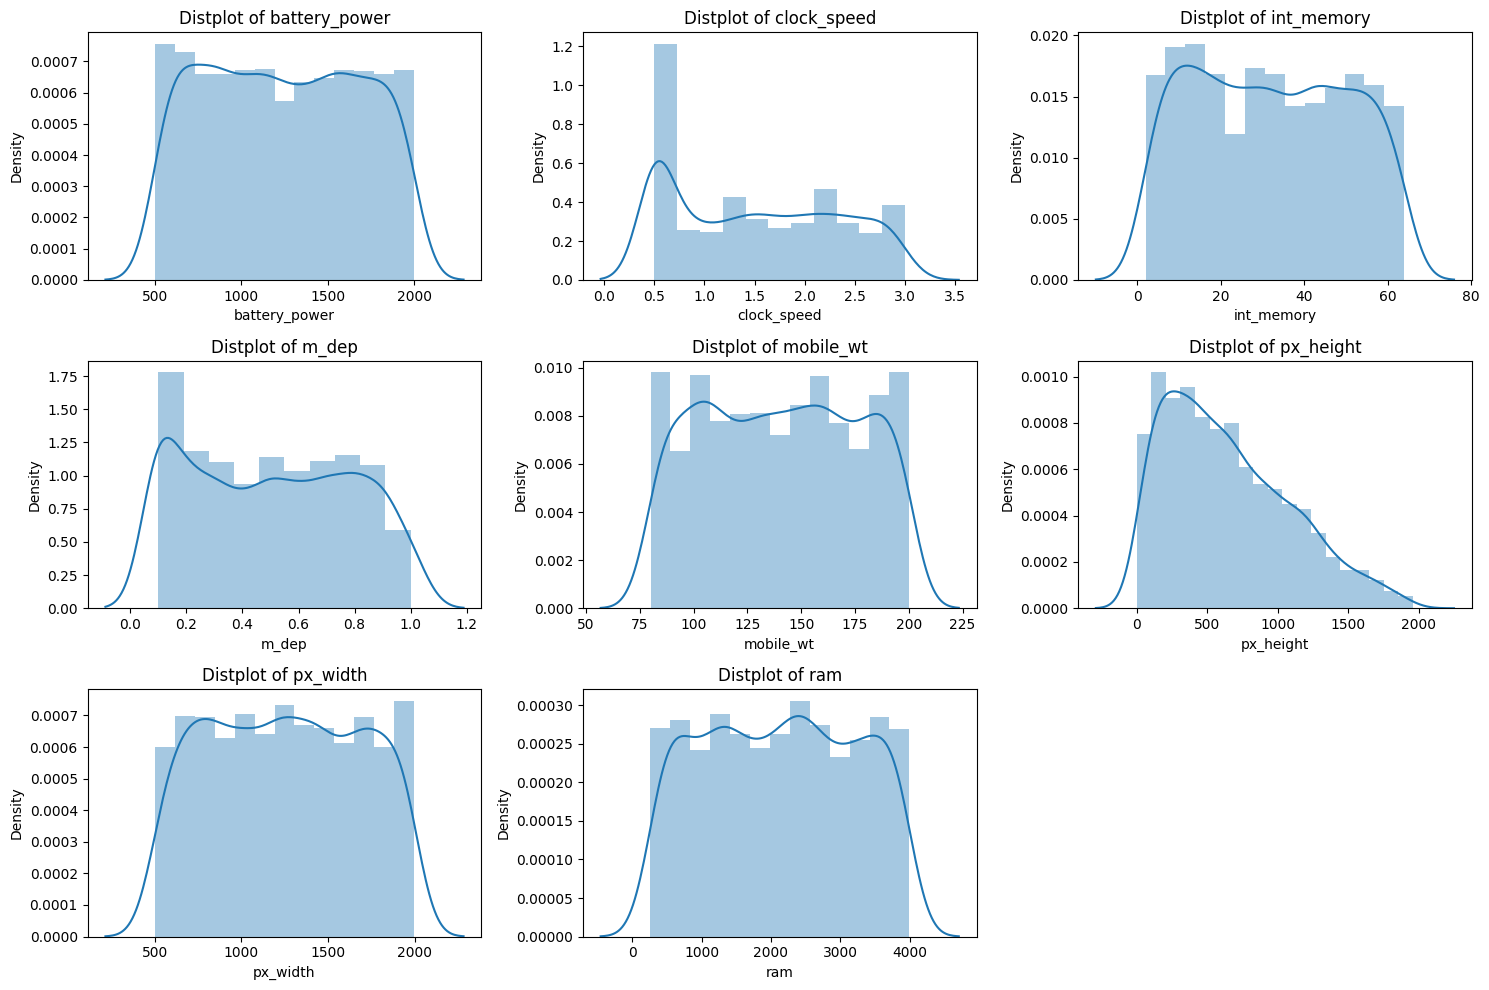

In [ ]:
# Distributions of numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[col], ax=axes[i])
    axes[i].set_title(f'Distplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations:** Most mobiles have high battery capacity and Majority have lower clock speeds; high-performance processors are fewer. Furthermore, RAM is Skewed distribution with more budget-friendly models having lower RAM. Finally,
Pixel Resolution having Wide variation in screen quality, with some having high resolutions.

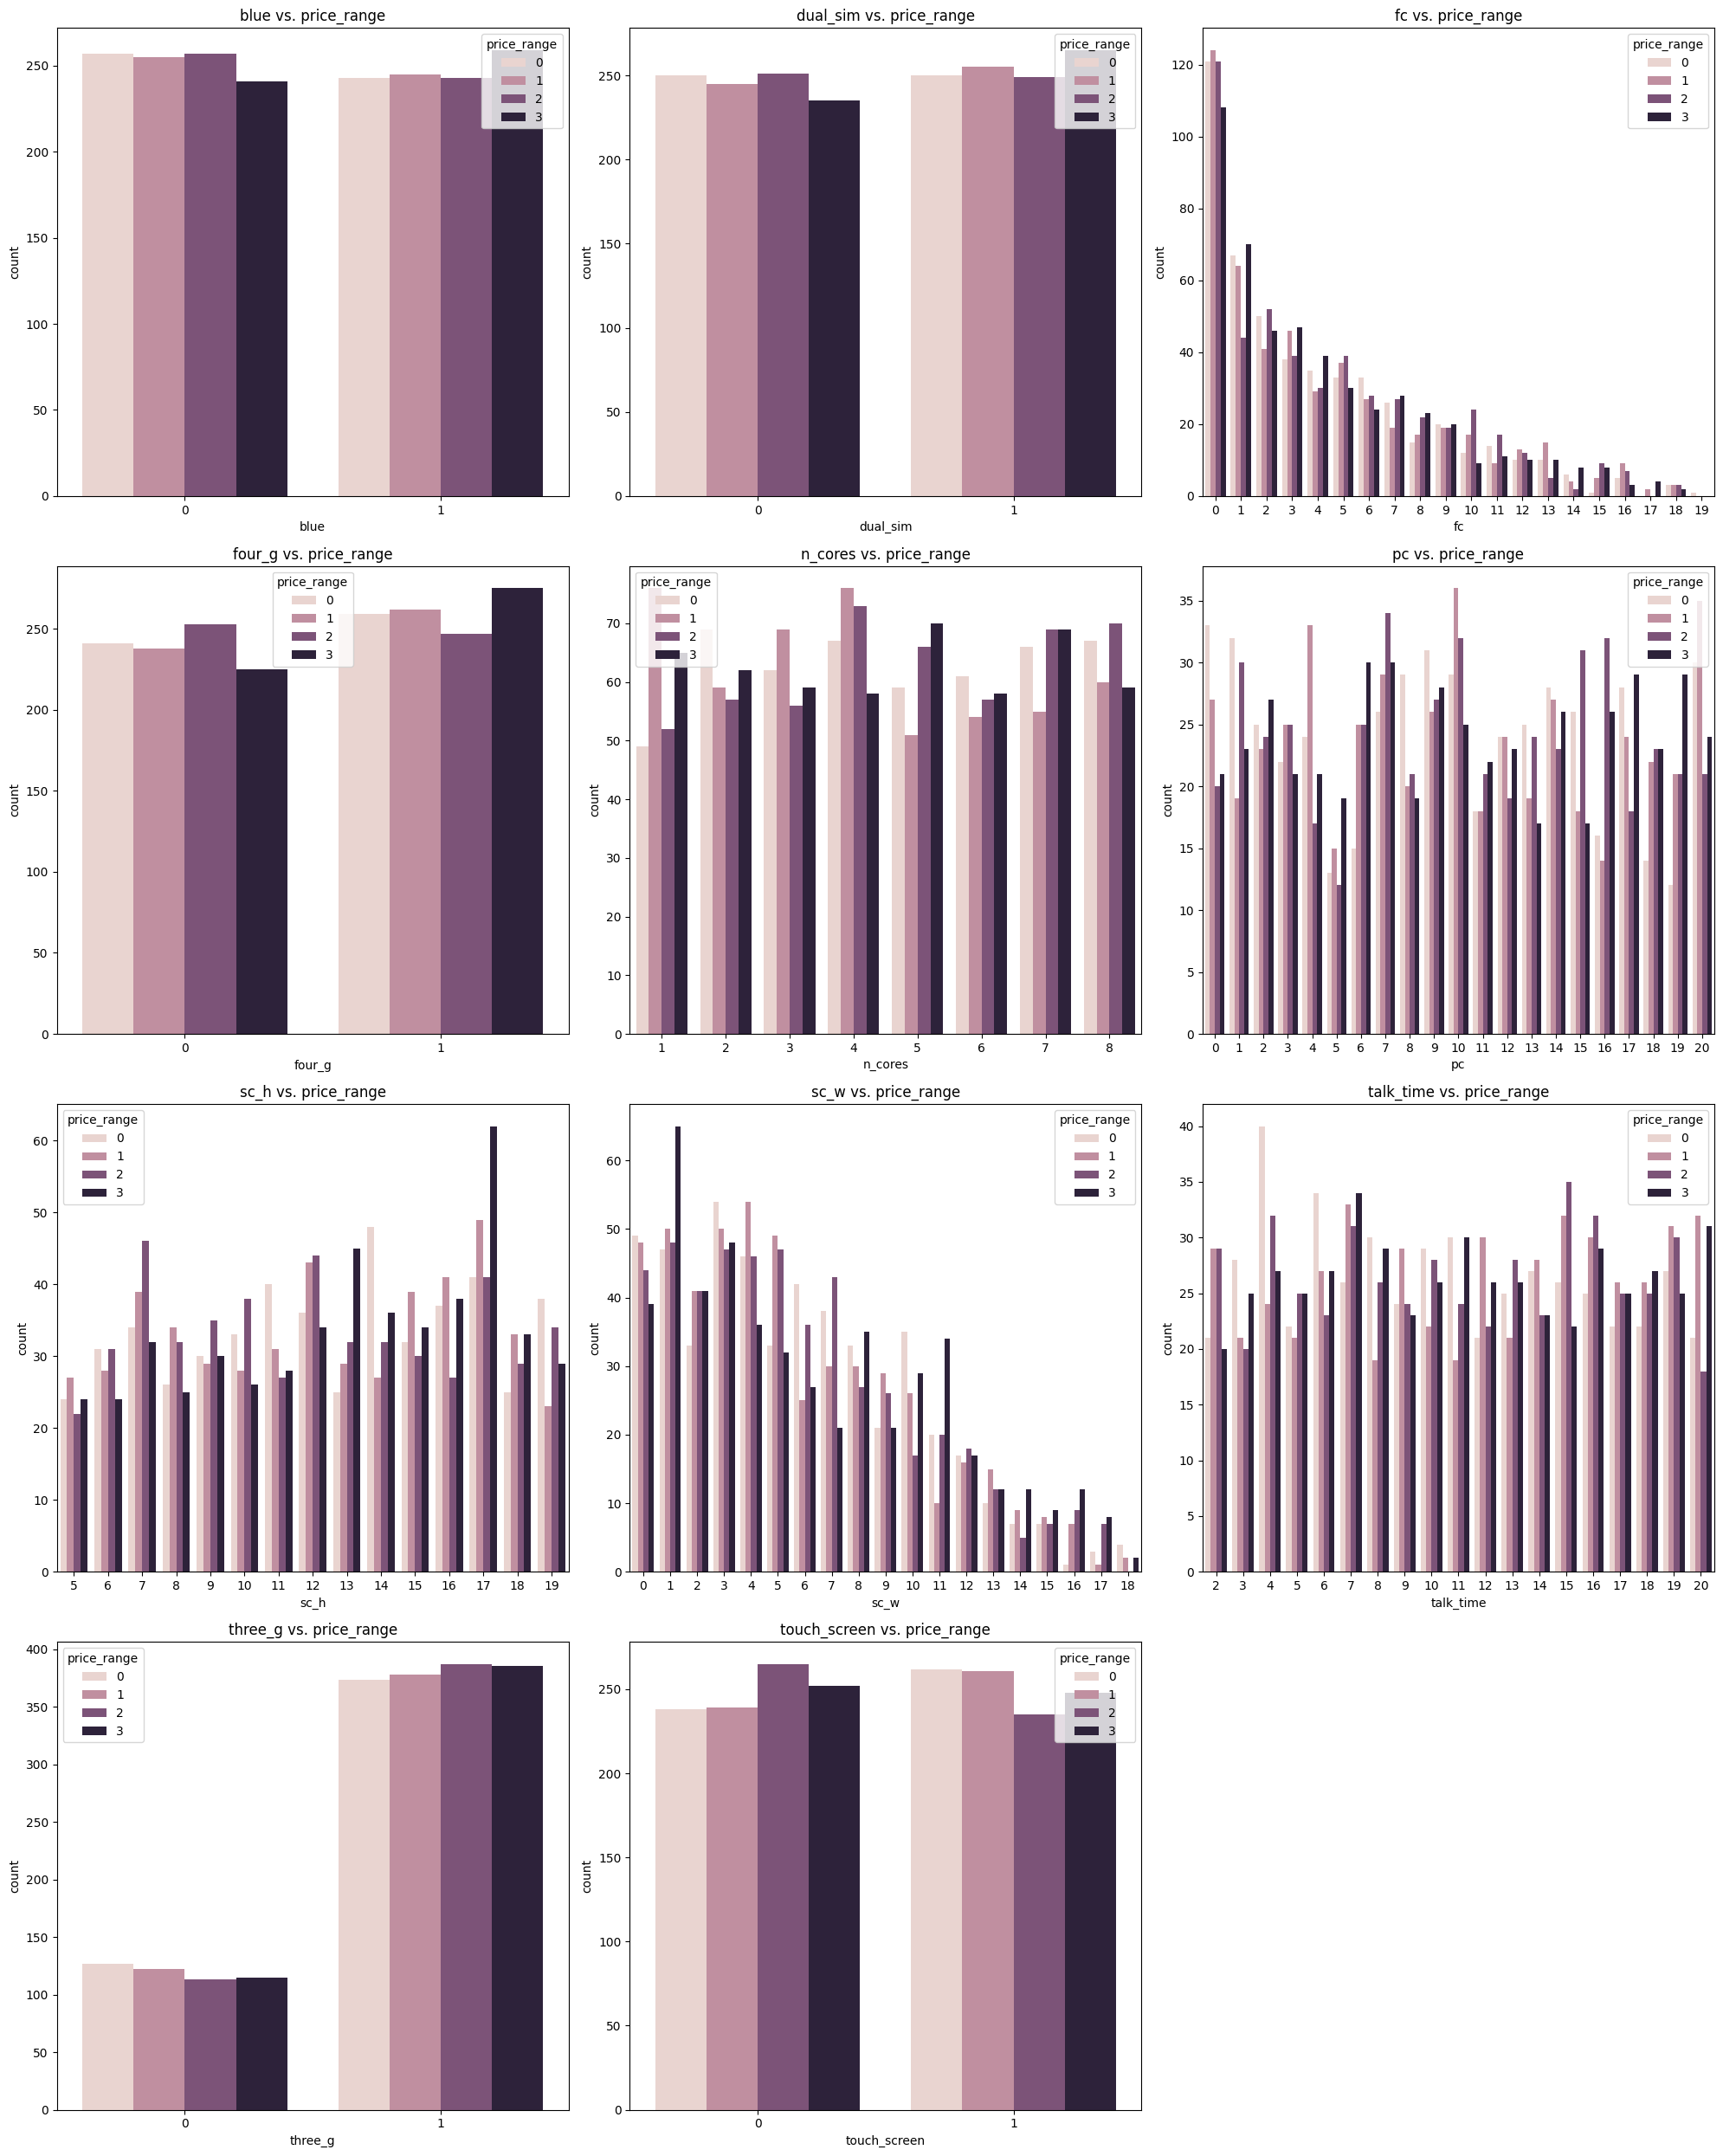

In [ ]:
# Bivariant analysis- each categorical feature with target variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(df_categorical.columns[:-1]):
    sns.countplot(x=col, hue='price_range', data=mob_data, ax=axes[i])
    axes[i].set_title(f'{col} vs. price_range')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Ondervations:**  Bluetooth and dual SIM support show no significant impact on price range, as they are common across all categories. Higher front and primary camera megapixels are more frequent in expensive phones. 4G support is a key differentiator, with premium models mostly having it. The number of processor cores slightly correlates with higher price ranges. Larger screen height and width are generally found in high-end devices. Talk time does not show a strong relationship with price. 3G support is common across all segments, making it less influential. Touchscreen availability is nearly universal, so it has no major effect on pricing.

In [ ]:
#Correlation matrix on numerical feartures
correlation_matrix = df_numerical.corr()
correlation_matrix

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram
battery_power,1.000000,0.011482,-0.004004,0.034085,0.001844,0.014901,-0.008402,-0.000653
clock_speed,0.011482,1.000000,0.006545,-0.014364,0.012350,-0.014523,-0.009476,0.003443
int_memory,-0.004004,0.006545,1.000000,0.006886,-0.034214,0.010441,-0.008335,0.032813
m_dep,0.034085,-0.014364,0.006886,1.000000,0.021756,0.025263,0.023566,-0.009434
mobile_wt,0.001844,0.012350,-0.034214,0.021756,1.000000,0.000939,0.000090,-0.002581
px_height,0.014901,-0.014523,0.010441,0.025263,0.000939,1.000000,0.510664,-0.020352
px_width,-0.008402,-0.009476,-0.008335,0.023566,0.000090,0.510664,1.000000,0.004105
ram,-0.000653,0.003443,0.032813,-0.009434,-0.002581,-0.020352,0.004105,1.000000


### **Modeling**

In [ ]:
#seperating independent and dependent varibles
X=mob_data.drop(columns=["price_range"])
y=mob_data["price_range"]

#splitting the data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(mob_data.shape)

print(X_train.shape)
print(X_test.shape)

(2000, 21)
(1600, 20)
(400, 20)


**Logistic Regression**

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       105
           1       0.62      0.64      0.63        91
           2       0.50      0.57      0.53        92
           3       0.78      0.75      0.76       112

    accuracy                           0.71       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.72      0.71      0.71       400



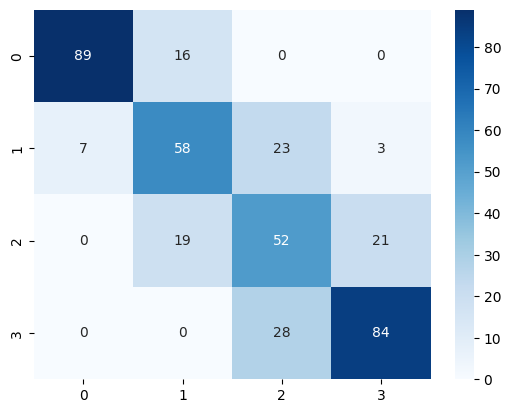

In [ ]:
logistic_regression_classifier = LogisticRegression(max_iter = 1000, random_state=0, multi_class='multinomial') # by default it will be multi_class='auto' binary/mutinomial will use by default
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.show()


**Decision Tree**

In [ ]:
Decision_Tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

Decision_Tree_classifier.fit(X_train, y_train)
y_pred = Decision_Tree_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.70      0.74        92
           3       0.86      0.90      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

[[ 92  13   0   0]
 [ 10  76   5   0]
 [  0  12  64  16]
 [  0   0  11 101]]


**Random Forest**

In [ ]:
RandomForest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForest_classifier.fit(X_train, y_train)
y_pred = RandomForest_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



**XG Boost**

In [ ]:
xgb_Classifier = xgb.XGBClassifier()
xgb_Classifier = xgb_Classifier.fit(X_train, y_train)

y_pred = xgb_Classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.93      0.90        91
           2       0.84      0.85      0.84        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400

[[100   5   0   0]
 [  4  85   2   0]
 [  0   7  78   7]
 [  0   0  13  99]]


**Support Vector Machine**

In [ ]:
SV_classifier = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
SV_classifier.fit(X_train, y_train)
y_pred = SV_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400

[[103   2   0   0]
 [  1  90   0   0]
 [  0   3  87   2]
 [  0   0   6 106]]


**K Nearest Neighbors**

In [ ]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
KNN_Classifier.fit(X_train, y_train)
y_pred = KNN_Classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

[[103   2   0   0]
 [  3  85   3   0]
 [  0   5  84   3]
 [  0   0   7 105]]


**Artificial Neural Network (ANN)**

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

num_classes = len(set(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile
#optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5486 - loss: 1.0082 - val_accuracy: 0.2531 - val_loss: 8.2127
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7818 - loss: 0.5548 - val_accuracy: 0.2656 - val_loss: 5.9281
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8178 - loss: 0.4296 - val_accuracy: 0.3438 - val_loss: 3.4088
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8345 - loss: 0.3996 - val_accuracy: 0.4406 - val_loss: 1.7136
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8132 - loss: 0.4257 - val_accuracy: 0.6125 - val_loss: 0.9608
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8169 - loss: 0.4553 - val_accuracy: 0.7688 - val_loss: 0.5231
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.4943 - val_accuracy: 0.8406 - val_loss: 0.3302
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7974 - loss: 0.4643 - val_accuracy: 0.8625 - 

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9390 - loss: 0.1534  
Test Loss: 0.16688743233680725
Test Accuracy: 0.9350000023841858


**Conclusion:**

The SVM and KNN models provided the most accurate predictions for mobile price classification, with an accuracy of 0.96 and 0.94 respectively.